In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/bipulshahi/Dataset/main/Big_Mart_Sales_Figure.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [2]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [3]:
df.select_dtypes(include='object').head(3)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1


In [4]:
df_num = df.select_dtypes(exclude='object')
df_num.head(3)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700


In [5]:
df_num.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


<Axes: >

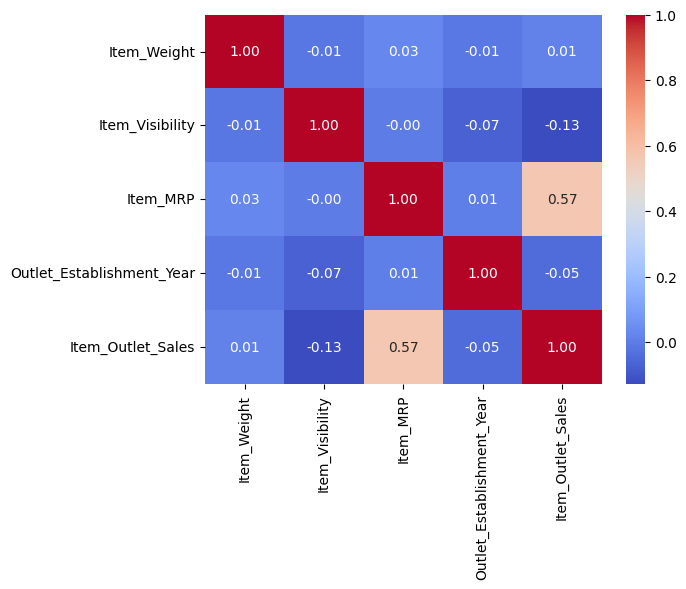

In [6]:
sns.heatmap(df_num.corr() , annot = True , cmap = 'coolwarm' , fmt = '.2f')

In [7]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
df.shape

(8523, 12)

In [9]:
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [10]:
df['Item_Identifier'].apply(lambda x: x[0:2]).value_counts()

Item_Identifier
FD    6125
NC    1599
DR     799
Name: count, dtype: int64

In [11]:
item_id = df['Item_Identifier'].apply(lambda x: x[0:2])
item_id_num = df['Item_Identifier'].apply(lambda x: int(x[-2:]))

In [12]:
df.insert(1,"Item_ide",item_id)
df.insert(2,"Item_ide_num",item_id_num)

In [13]:
df = df.drop('Item_Identifier',axis = 'columns')

In [14]:
df.head()

,Item_ide,Item_ide_num,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FD,15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DR,1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FD,15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FD,7,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NC,19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [15]:
print(df['Item_ide'].nunique())
print(df['Item_ide_num'].nunique())

3
60


In [16]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [17]:
'''
def fix_fat_content(type):
  if (type == 'Low Fat') | (type == 'low fat')| (type == 'LF'):
    return 'Low Fat'
  elif (type == 'Regular') | (type == 'reg'):
    return 'Regular'
'''

"\ndef fix_fat_content(type):\n  if (type == 'Low Fat') | (type == 'low fat')| (type == 'LF'):\n    return 'Low Fat'\n  elif (type == 'Regular') | (type == 'reg'):\n    return 'Regular'\n"

In [18]:
'''
def fix_fat_content(type):
  if type in ['Low Fat','low fat','LF']:
    return 'Low Fat'
  elif type in ['Regular','reg']:
    return 'Regular'
'''

"\ndef fix_fat_content(type):\n  if type in ['Low Fat','low fat','LF']:\n    return 'Low Fat'\n  elif type in ['Regular','reg']:\n    return 'Regular'\n"

In [19]:
#Write code to convert 5 existing category in 'Item Fat Content' into 2 category

df['Item_Fat_Content'] = df['Item_Fat_Content'].apply(lambda x : 'Low Fat' if x in ['Low Fat','low fat','LF'] else 'Regular')

In [20]:
df.head()

,Item_ide,Item_ide_num,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FD,15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DR,1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FD,15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FD,7,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NC,19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [21]:
df.nunique()

Item_ide                        3
Item_ide_num                   60
Item_Weight                   415
Item_Fat_Content                2
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [22]:
df['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

In [23]:
df['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [24]:
df['Outlet_Identifier'] = df['Outlet_Identifier'].apply(lambda x : int(x[-2:]))

In [25]:
df.head()

,Item_ide,Item_ide_num,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FD,15,9.30,Low Fat,0.016047,Dairy,249.8092,49,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DR,1,5.92,Regular,0.019278,Soft Drinks,48.2692,18,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FD,15,17.50,Low Fat,0.016760,Meat,141.6180,49,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FD,7,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,10,1998,NaN,Tier 3,Grocery Store,732.3800
4,NC,19,8.93,Low Fat,0.000000,Household,53.8614,13,1987,High,Tier 3,Supermarket Type1,994.7052


In [26]:
df['Outlet_Establishment_Year'] = 2024 - df['Outlet_Establishment_Year']

In [27]:
df['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [28]:
df['Outlet_Location_Type'].value_counts()

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

In [29]:
df['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

In [30]:
df.isna().sum()

Item_ide                        0
Item_ide_num                    0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [31]:
print(df['Item_Weight'].mean())
print(df['Item_Weight'].median())

12.857645184135976
12.6


<Axes: ylabel='Item_Weight'>

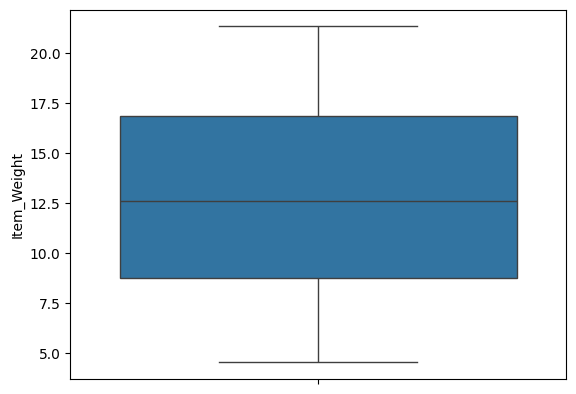

In [32]:
sns.boxplot(df['Item_Weight'])

* Bivariate analysis on weight column

In [33]:
df.groupby('Item_ide')['Item_Weight'].mean()

Item_ide
DR    12.072348
FD    12.832186
NC    13.354532
Name: Item_Weight, dtype: float64

In [34]:
df.groupby('Item_Fat_Content')['Item_Weight'].mean()

Item_Fat_Content
Low Fat    12.937387
Regular    12.711654
Name: Item_Weight, dtype: float64

In [35]:
df.groupby('Item_Type')['Item_Weight'].mean()

Item_Type
Baking Goods             12.277108
Breads                   11.346936
Breakfast                12.768202
Canned                   12.305705
Dairy                    13.426069
Frozen Foods             12.867061
Fruits and Vegetables    13.224769
Hard Drinks              11.400328
Health and Hygiene       13.142314
Household                13.384736
Meat                     12.817344
Others                   13.853285
Seafood                  12.552843
Snack Foods              12.987880
Soft Drinks              11.847460
Starchy Foods            13.690731
Name: Item_Weight, dtype: float64

* fill the missing values in item weight based on average value of item_type. which means if item_weight is missing for Baking Goods use '12.27' to fill it , if it missing for 'Breads' use 11.34 to fill it and so on.

In [36]:
df.groupby('Item_Type')['Item_Weight'].transform('mean')

0       13.426069
1       11.847460
2       12.817344
3       13.224769
4       13.384736
          ...    
8518    12.987880
8519    12.277108
8520    13.142314
8521    12.987880
8522    11.847460
Name: Item_Weight, Length: 8523, dtype: float64

In [37]:
df['Item_Weight'] = df['Item_Weight'].fillna(df.groupby('Item_Type')['Item_Weight'].transform('mean'))

In [38]:
df.head()

,Item_ide,Item_ide_num,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FD,15,9.30,Low Fat,0.016047,Dairy,249.8092,49,25,Medium,Tier 1,Supermarket Type1,3735.1380
1,DR,1,5.92,Regular,0.019278,Soft Drinks,48.2692,18,15,Medium,Tier 3,Supermarket Type2,443.4228
2,FD,15,17.50,Low Fat,0.016760,Meat,141.6180,49,25,Medium,Tier 1,Supermarket Type1,2097.2700
3,FD,7,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,10,26,NaN,Tier 3,Grocery Store,732.3800
4,NC,19,8.93,Low Fat,0.000000,Household,53.8614,13,37,High,Tier 3,Supermarket Type1,994.7052


In [39]:
df.isna().sum()

Item_ide                        0
Item_ide_num                    0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [40]:
df['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [41]:
df['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

In [42]:
pd.crosstab(df['Outlet_Type'],df['Outlet_Size'])

Outlet_Size,High,Medium,Small
Outlet_Type,,,
Grocery Store,0,0,528
Supermarket Type1,932,930,1860
Supermarket Type2,0,928,0
Supermarket Type3,0,935,0


In [43]:
df['Outlet_Location_Type'].value_counts()

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

In [44]:
pd.crosstab(df['Outlet_Location_Type'],df['Outlet_Size'])

Outlet_Size,High,Medium,Small
Outlet_Location_Type,,,
Tier 1,0,930,1458
Tier 2,0,0,930
Tier 3,932,1863,0


In [45]:
outlet_size_based_on_outlet_loaction_type = df['Outlet_Location_Type'].transform(lambda x : 'Small' if x in ['Tier 1','Tier 2'] else 'Medium')
outlet_size_based_on_outlet_loaction_type

0        Small
1       Medium
2        Small
3       Medium
4       Medium
         ...  
8518    Medium
8519     Small
8520     Small
8521    Medium
8522     Small
Name: Outlet_Location_Type, Length: 8523, dtype: object

In [46]:
df['Outlet_Size'] = df['Outlet_Size'].fillna(outlet_size_based_on_outlet_loaction_type)

In [47]:
pd.crosstab(df['Outlet_Location_Type'],df['Outlet_Size'])

Outlet_Size,High,Medium,Small
Outlet_Location_Type,,,
Tier 1,0,930,1458
Tier 2,0,0,2785
Tier 3,932,2418,0


In [48]:
df.head()

,Item_ide,Item_ide_num,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FD,15,9.30,Low Fat,0.016047,Dairy,249.8092,49,25,Medium,Tier 1,Supermarket Type1,3735.1380
1,DR,1,5.92,Regular,0.019278,Soft Drinks,48.2692,18,15,Medium,Tier 3,Supermarket Type2,443.4228
2,FD,15,17.50,Low Fat,0.016760,Meat,141.6180,49,25,Medium,Tier 1,Supermarket Type1,2097.2700
3,FD,7,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,10,26,Medium,Tier 3,Grocery Store,732.3800
4,NC,19,8.93,Low Fat,0.000000,Household,53.8614,13,37,High,Tier 3,Supermarket Type1,994.7052


* Data Encoding
  * Label Encoding
    * Ordinal data - Item_Fat_Content, Outlet_Size, Outlet_Location_Type, Outlet_Type
  * One hot Encoding
    * Nominal - Item_ide, Item_Type

In [49]:
non_num_cols = df.select_dtypes(include='object').head(3).columns
non_num_cols

Index(['Item_ide', 'Item_Fat_Content', 'Item_Type', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [50]:
for cols in non_num_cols:
  print(cols, '-' , df[cols].unique())

Item_ide - ['FD' 'DR' 'NC']
Item_Fat_Content - ['Low Fat' 'Regular']
Item_Type - ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Outlet_Size - ['Medium' 'High' 'Small']
Outlet_Location_Type - ['Tier 1' 'Tier 3' 'Tier 2']
Outlet_Type - ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [51]:
#Label encoding
df['Item_Fat_Content'] = df['Item_Fat_Content'].map({'Low Fat':0, 'Regular':1})
df['Outlet_Size'] = df['Outlet_Size'].map({'Small':0, 'Medium':1, 'High':2})
df['Outlet_Location_Type'] = df['Outlet_Location_Type'].map({'Tier 1':0, 'Tier 2':1, 'Tier 3':2})
df['Outlet_Type'] = df['Outlet_Type'].map({'Grocery Store' : 0 ,
                                           'Supermarket Type1':1, 'Supermarket Type2':2, 'Supermarket Type3':3})

In [52]:
#One hot encoding
df1 = pd.get_dummies(df , columns=['Item_ide','Item_Type'])
df1.dtypes

Item_ide_num                         int64
Item_Weight                        float64
Item_Fat_Content                     int64
Item_Visibility                    float64
Item_MRP                           float64
Outlet_Identifier                    int64
Outlet_Establishment_Year            int64
Outlet_Size                          int64
Outlet_Location_Type                 int64
Outlet_Type                          int64
Item_Outlet_Sales                  float64
Item_ide_DR                           bool
Item_ide_FD                           bool
Item_ide_NC                           bool
Item_Type_Baking Goods                bool
Item_Type_Breads                      bool
Item_Type_Breakfast                   bool
Item_Type_Canned                      bool
Item_Type_Dairy                       bool
Item_Type_Frozen Foods                bool
Item_Type_Fruits and Vegetables       bool
Item_Type_Hard Drinks                 bool
Item_Type_Health and Hygiene          bool
Item_Type_H

In [53]:
df_num.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [54]:
X = df1.drop('Item_Outlet_Sales' , axis = 'columns')
Y = df1['Item_Outlet_Sales']

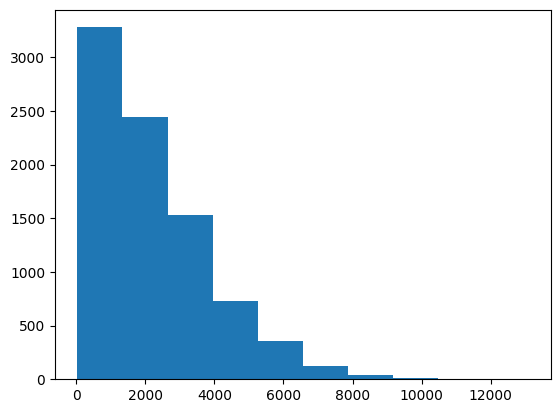

In [55]:
plt.hist(Y)
plt.show()

<Axes: ylabel='Item_Outlet_Sales'>

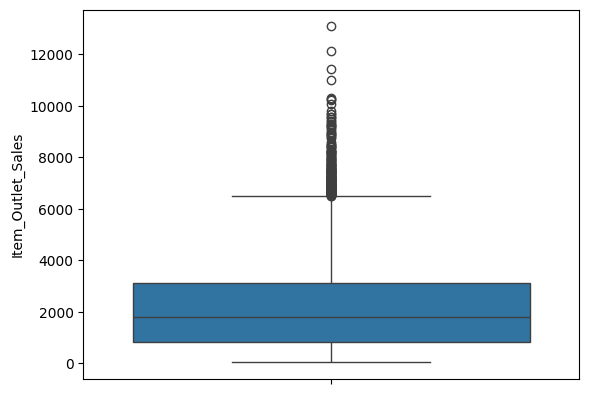

In [56]:
sns.boxplot(Y)

In [57]:
Y.describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [58]:
q1 = Y.quantile(0.25)
q3 = Y.quantile(0.75)

iqr = Y.quantile(0.75) - Y.quantile(0.25)

upper_fence = q3 + (1.5 * iqr )
lower_fence = q1 - (1.5 * iqr)

print(upper_fence)
print(lower_fence)

6501.8699
-2566.3261


In [59]:
((Y > lower_fence) & (Y < upper_fence)).sum()/len(Y)

0.9781766983456529

In [60]:
((Y < lower_fence) | (Y > upper_fence)).sum()

186

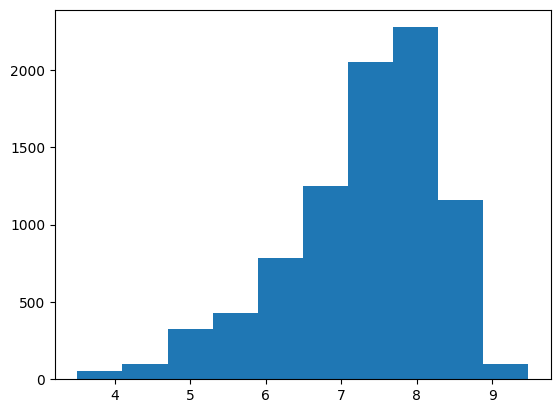

In [61]:
plt.hist(np.log(Y))
plt.show()

<Axes: ylabel='Item_Outlet_Sales'>

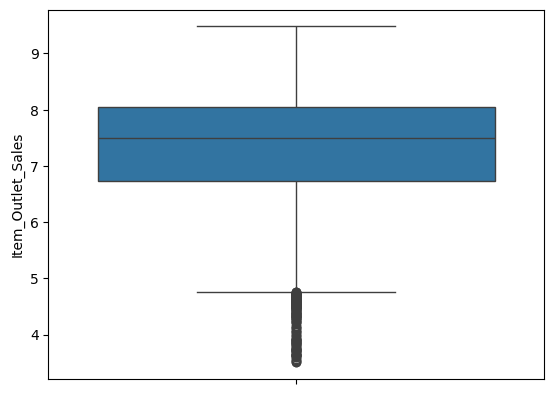

In [62]:
sns.boxplot(np.log(Y))

In [63]:
q1_log = np.log(Y).quantile(0.25)
q3_log = np.log(Y).quantile(0.75)

iqr_log = np.log(Y).quantile(0.75) - np.log(Y).quantile(0.25)

upper_fence_log = q3_log + (1.5 * iqr_log )
lower_fence_log = q1_log - (1.5 * iqr_log)

print(upper_fence_log)
print(lower_fence_log)

((np.log(Y) > lower_fence_log) & (np.log(Y) < upper_fence_log)).sum()/len(Y)

10.00914421762982
4.756960961558495


0.9795846532910947

In [64]:
#Perform log transform and remove outliers outside upper fence and lower fence

Y_log = np.log(Y)

q1_log = Y_log.quantile(0.25)
q3_log = Y_log.quantile(0.75)

iqr_log = q3_log - q1_log

upper_fence_log = q3_log + (1.5 * iqr_log)
lower_fence_log = q1_log - (1.5 * iqr_log)

Yf = Y_log[(Y_log > lower_fence_log) & (Y_log < upper_fence_log)]
Xf = X[(Y_log > lower_fence_log) & (Y_log < upper_fence_log)]

In [65]:
Xf.shape

(8349, 29)

In [66]:
Yf.shape

(8349,)

<Axes: ylabel='Item_Outlet_Sales'>

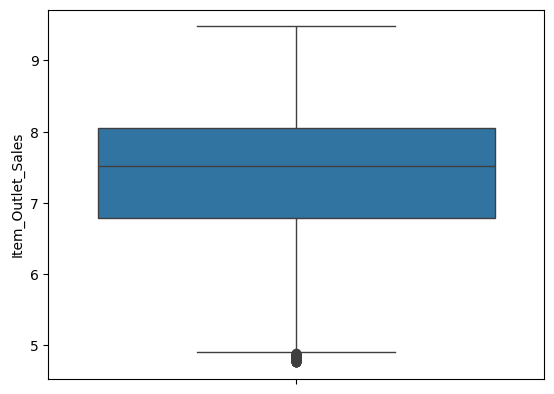

In [67]:
sns.boxplot(Yf)

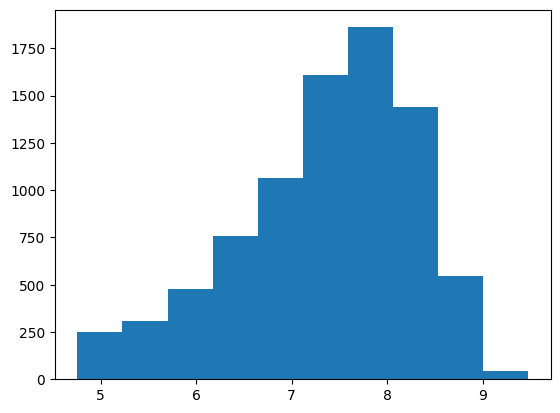

In [68]:
plt.hist(Yf)
plt.show()

In [69]:
Xf

,Item_ide_num,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,15,9.300,0,0.016047,249.8092,49,25,1,0,1,...,False,False,False,False,False,False,False,False,False,False
1,1,5.920,1,0.019278,48.2692,18,15,1,2,2,...,False,False,False,False,False,False,False,False,True,False
2,15,17.500,0,0.016760,141.6180,49,25,1,0,1,...,False,False,False,False,True,False,False,False,False,False
3,7,19.200,1,0.000000,182.0950,10,26,1,2,0,...,True,False,False,False,False,False,False,False,False,False
4,19,8.930,0,0.000000,53.8614,13,37,2,2,1,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,22,6.865,0,0.056783,214.5218,13,37,2,2,1,...,False,False,False,False,False,False,False,True,False,False
8519,36,8.380,1,0.046982,108.1570,45,22,0,1,1,...,False,False,False,False,False,False,False,False,False,False
8520,29,10.600,0,0.035186,85.1224,35,20,0,1,1,...,False,False,True,False,False,False,False,False,False,False
8521,46,7.210,1,0.145221,103.1332,18,15,1,2,2,...,False,False,False,False,False,False,False,True,False,False


In [70]:
#Split the data

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(Xf,Yf,test_size = 0.2,random_state = 10)

In [71]:
#Min Max Scaling

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_trainScaled = scaler.fit_transform(X_train)
X_testScaled = scaler.transform(X_test)

In [72]:
#Build a model using linear regression

from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X_trainScaled,Y_train)

LinearRegression()

In [73]:
#Evaluate the model performance

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

Y_train_pred = model1.predict(X_trainScaled)
Y_test_pred = model1.predict(X_testScaled)

print('Train MAE : ' , mean_absolute_error(Y_train,Y_train_pred))
print('Test MAE : ' , mean_absolute_error(Y_test,Y_test_pred))

print()

print('R2_score' , r2_score(Y_test,Y_test_pred))
print('R2_score' , r2_score(Y_train,Y_train_pred))

Train MAE :  0.5025849347962458
Test MAE :  0.4995769006379424

R2_score 0.5614553898048038
R2_score 0.5247696437240599


**Polynomial Regression**

In [74]:
from sklearn.preprocessing import PolynomialFeatures,MinMaxScaler
poly = PolynomialFeatures(degree = 2,include_bias = False,interaction_only=True)

'''
n1 = np.random.randint(0,10,(6,2))
n1

poly.fit(n1,)
poly.transform(n1)
'''

poly.fit(X_train)

xtrainPoly = poly.transform(X_train)
xtestPoly = poly.transform(X_test)


xtrainPolyScaled = scaler.fit_transform(xtrainPoly)
xtestPolyScaled = scaler.transform(xtestPoly)

In [75]:
X_train.shape

(6679, 29)

In [76]:
xtrainPoly.shape

(6679, 435)

In [77]:
model2 = LinearRegression()
model2.fit(xtrainPolyScaled,Y_train)

LinearRegression()

In [78]:
#Evaluate the model performance

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

Y_train_pred_2 = model2.predict(xtrainPolyScaled)
Y_test_pred_2 = model2.predict(xtestPolyScaled)

print('Train MAE : ' , mean_absolute_error(Y_train,Y_train_pred_2))
print('Test MAE : ' , mean_absolute_error(Y_test,Y_test_pred_2))

print()

print('R2_score' , r2_score(Y_test,Y_test_pred_2))
print('R2_score' , r2_score(Y_train,Y_train_pred_2))

Train MAE :  0.39897263817701206
Test MAE :  0.4167177218164381

R2_score 0.6808797295160353
R2_score 0.6892045187249431


**Predictions**

In [79]:
model2.predict(scaler.transform(poly.transform([X_test.values[77]])))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([7.88619995])

In [80]:
print(np.exp(model2.predict(scaler.transform(poly.transform([X_test.values[77]])))))

[2660.31536009]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [81]:
a = 7
print(np.log(a))

1.9459101490553132


In [82]:
print(np.exp(1.9459101490553132))

6.999999999999999


**Serialization of model**

In [83]:
import pickle

pickle.dump(model2, open('model.pkl','wb'))

pickle.dump(scaler, open('scaler.pkl','wb'))

pickle.dump(poly, open('poly.pkl','wb'))

In [84]:
import json

data_columns = {"features" : list(X.columns)}

with open("columns.json","w") as f:
  f.write(json.dumps(data_columns))